In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Set paths
test_location = "/content/drive/MyDrive/Colab Notebooks/test_dataset"
model_path = "/content/drive/MyDrive/Colab Notebooks/fake currency/Model2/mobilenet2_optimized.keras"

In [ ]:
# Load the trained MobileNet model
model = load_model(model_path)

In [ ]:
# Image size and batch size
img_size = 224
batch_size = 64
num_classes = 12

In [ ]:
# Data preprocessing (specific to MobileNet)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

# Load test dataset
test_generator = test_datagen.flow_from_directory(
    test_location,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 805 images belonging to 12 classes.


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")




/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 320s 26s/step - accuracy: 0.2167 - loss: 5.1046
Validation Loss: 4.0594
Validation Accuracy: 0.2385


In [ ]:
# Get predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step


In [ ]:
class_labels = test_generator.class_indices  # Dictionary mapping class names to numerical labels
print("Class Indices:", class_labels)


Class Indices: {'10': 0, '100': 1, '20': 2, '200': 3, '50': 4, '500': 5, 'fake10': 6, 'fake100': 7, 'fake20': 8, 'fake200': 9, 'fake50': 10, 'fake500': 11}


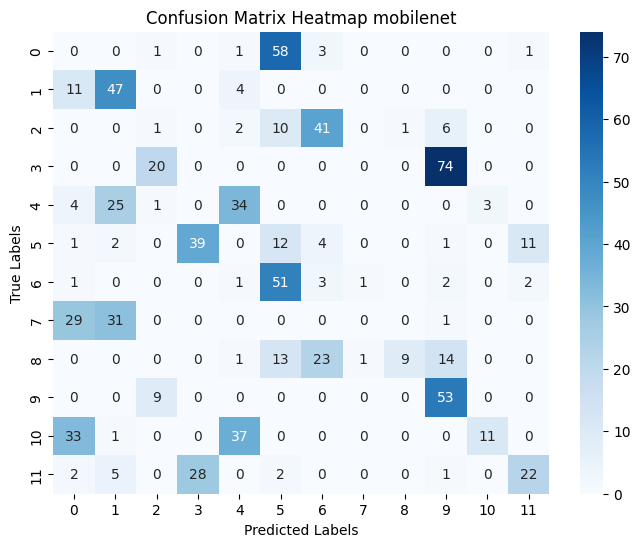

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Calculate confusion matrix
# Use y_true instead of y_test
cm = confusion_matrix(y_true, y_pred)

unique_labels = np.unique(np.concatenate((y_true, y_pred)))  # Ensure all labels are considered
label_names = [class_labels.get(label, f"Class {label}") for label in unique_labels]
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
# Use y_true instead of y_test for tick labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.title("Confusion Matrix Heatmap mobilenet")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Classification Report
# Get unique classes from y_true
unique_classes = np.unique(y_true)

# Get class names corresponding to unique classes
target_names = [k for k, v in test_generator.class_indices.items() if v in unique_classes]

# Generate classification report using target_names derived from unique_classes
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

          10       0.00      0.00      0.00        64
         100       0.42      0.76      0.54        62
          20       0.03      0.02      0.02        61
         200       0.00      0.00      0.00        94
          50       0.42      0.51      0.46        67
         500       0.08      0.17      0.11        70
      fake10       0.04      0.05      0.04        61
     fake100       0.00      0.00      0.00        61
      fake20       0.90      0.15      0.25        61
     fake200       0.35      0.85      0.50        62
      fake50       0.79      0.13      0.23        82
     fake500       0.61      0.37      0.46        60

    accuracy                           0.24       805
   macro avg       0.30      0.25      0.22       805
weighted avg       0.30      0.24      0.21       805



In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_true (true labels) and y_pred (predicted labels)
accuracy = accuracy_score(y_true, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 23.85%
